# Data Acquisition: From JSON Data

In [1]:
import pandas as pd
import json

In [2]:
obj = """
{
    "dayOfWeek": [
        { "Sunday": 0 }, { "Monday": 1 }, { "Tuesday": 2 }, { "Wednesday": 3 },
        { "Thursday": 4 }, { "Friday": 5 }, { "Saturday": 6 }
    ]
}
"""

In [3]:
json.loads(obj)

{'dayOfWeek': [{'Sunday': 0},
  {'Monday': 1},
  {'Tuesday': 2},
  {'Wednesday': 3},
  {'Thursday': 4},
  {'Friday': 5},
  {'Saturday': 6}]}

In [4]:
result = json.loads(obj)
type(result)

dict

In [14]:
df6 = pd.DataFrame(result['dayOfWeek']).T
df6

,0,1,2,3,4,5,6
Sunday,0.0,NaN,NaN,NaN,NaN,NaN,NaN
Monday,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Tuesday,NaN,NaN,2.0,NaN,NaN,NaN,NaN
Wednesday,NaN,NaN,NaN,3.0,NaN,NaN,NaN
Thursday,NaN,NaN,NaN,NaN,4.0,NaN,NaN
Friday,NaN,NaN,NaN,NaN,NaN,5.0,NaN
Saturday,NaN,NaN,NaN,NaN,NaN,NaN,6.0


# Getting Data using API

In [15]:
import urllib.request

&type=json

In [18]:
url = "http://apis.data.go.kr/B553077/api/open/sdsc/storeZoneOne?key=573&ServiceKey=zUsap7I%2BSXPwfCt3zHKg0jwPW2gxxSTqSRvwqt0STgw8OwtHAUbkzsWo5azP3P0pv%2Bt9UoGBBEbfhthnMWU9dA%3D%3D&type=json"

response = urllib.request.urlopen(url)
json_str = response.read().decode('utf-8')

In [19]:
json_str

'{\n\t"header" : {\n\t\t"description" : "소상공인시장진흥공단 주요상권"\n\t\t,"columns" : ["상권번호","상권명","시도코드","시도명","시군구코드","시군구명","상권면적","좌표개수","좌표값","데이터기준일자"]\n\t\t,"resultCode" : "00"\n\t\t,"resultMsg" : "NORMAL SERVICE"\n\t},\n\t"body" : {\n\t\t\t"items" : [\n\t\t\t\t{\n\t\t\t\t"trarNo" : 573\n\t\t\t\t,"mainTrarNm" : "부산 금정구 구서동역"\n\t\t\t\t,"ctprvnCd" : "26"\n\t\t\t\t,"ctprvnNm" : "부산광역시"\n\t\t\t\t,"signguCd" : "26410"\n\t\t\t\t,"signguNm" : "금정구"\n\t\t\t\t,"trarArea" : 66080.5\n\t\t\t\t,"coordNum" : 16\n\t\t\t\t,"coords" : "POLYGON ((129.09092 35.248544, 129.090527 35.248755, 129.089265 35.248054, 129.089212 35.247334, 129.088914 35.247291, 129.088755 35.24522, 129.089828 35.244913, 129.08994 35.246723, 129.091246 35.246667, 129.091377 35.246602, 129.091466 35.247503, 129.091906 35.247535, 129.092248 35.247604, 129.091985 35.248508, 129.091776 35.248483, 129.09092 35.248544))"\n\t\t\t\t,"stdrDt" : "2015-12-17"\n\t\t\t\t}\n\t\t\t]\n\t}\n}\n'

In [20]:
json_object = json.loads(json_str)
json_object

{'header': {'description': '소상공인시장진흥공단 주요상권',
  'columns': ['상권번호',
   '상권명',
   '시도코드',
   '시도명',
   '시군구코드',
   '시군구명',
   '상권면적',
   '좌표개수',
   '좌표값',
   '데이터기준일자'],
  'resultCode': '00',
  'resultMsg': 'NORMAL SERVICE'},
 'body': {'items': [{'trarNo': 573,
    'mainTrarNm': '부산 금정구 구서동역',
    'ctprvnCd': '26',
    'ctprvnNm': '부산광역시',
    'signguCd': '26410',
    'signguNm': '금정구',
    'trarArea': 66080.5,
    'coordNum': 16,
    'coords': 'POLYGON ((129.09092 35.248544, 129.090527 35.248755, 129.089265 35.248054, 129.089212 35.247334, 129.088914 35.247291, 129.088755 35.24522, 129.089828 35.244913, 129.08994 35.246723, 129.091246 35.246667, 129.091377 35.246602, 129.091466 35.247503, 129.091906 35.247535, 129.092248 35.247604, 129.091985 35.248508, 129.091776 35.248483, 129.09092 35.248544))',
    'stdrDt': '2015-12-17'}]}}

In [21]:
body = [json_object['body']['items']]
body

[[{'trarNo': 573,
   'mainTrarNm': '부산 금정구 구서동역',
   'ctprvnCd': '26',
   'ctprvnNm': '부산광역시',
   'signguCd': '26410',
   'signguNm': '금정구',
   'trarArea': 66080.5,
   'coordNum': 16,
   'coords': 'POLYGON ((129.09092 35.248544, 129.090527 35.248755, 129.089265 35.248054, 129.089212 35.247334, 129.088914 35.247291, 129.088755 35.24522, 129.089828 35.244913, 129.08994 35.246723, 129.091246 35.246667, 129.091377 35.246602, 129.091466 35.247503, 129.091906 35.247535, 129.092248 35.247604, 129.091985 35.248508, 129.091776 35.248483, 129.09092 35.248544))',
   'stdrDt': '2015-12-17'}]]

In [22]:
from pandas.io.json import json_normalize

In [24]:
pd.json_normalize(json_object['body']['items'])

,trarNo,mainTrarNm,ctprvnCd,ctprvnNm,signguCd,signguNm,trarArea,coordNum,coords,stdrDt
0,573,부산 금정구 구서동역,26,부산광역시,26410,금정구,66080.5,16,"POLYGON ((129.09092 35.248544, 129.090527 35.2...",2015-12-17


In [27]:
# pip install pandas_datareader
import pandas_datareader as pdr

In [28]:
df = pdr.get_data_yahoo('005930.KS')     # 삼성전자 주가 읽어오기
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-05-02,25240.0,24900.0,24940.0,25000.0,7027600.0,21737.931641
2016-05-03,25400.0,25120.0,25340.0,25220.0,7903300.0,21929.228516
2016-05-04,25800.0,25240.0,25440.0,25800.0,14702750.0,22433.542969
2016-05-09,26000.0,25700.0,25800.0,25980.0,13718100.0,22590.060547
2016-05-10,26000.0,25760.0,25980.0,25920.0,8559550.0,22537.888672
...,...,...,...,...,...,...
2021-04-23,82900.0,81600.0,81900.0,82800.0,17805080.0,82800.000000
2021-04-26,83500.0,82600.0,82900.0,83500.0,15489938.0,83500.000000
2021-04-27,83300.0,82500.0,83200.0,82900.0,12941533.0,82900.000000


<AxesSubplot:xlabel='Date'>

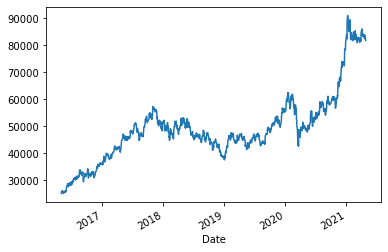

In [29]:
df['Close'].plot()

In [30]:
df2 = pdr.get_data_yahoo('035420.KS')      # 네이버 주가 읽어오기
df2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-05-02,136000.0,133400.0,135800.0,135600.0,288895.0,134347.312500
2016-05-03,136400.0,135000.0,136400.0,135200.0,343900.0,133951.015625
2016-05-04,136600.0,134000.0,135800.0,136000.0,697250.0,134743.625000
2016-05-09,141000.0,137400.0,139800.0,140000.0,925425.0,138706.687500
2016-05-10,142800.0,139000.0,141600.0,141400.0,532275.0,140093.718750
...,...,...,...,...,...,...
2021-04-23,379500.0,374000.0,377500.0,378000.0,505140.0,378000.000000
2021-04-26,379000.0,374500.0,376500.0,377500.0,484369.0,377500.000000
2021-04-27,381500.0,376000.0,378000.0,380000.0,392509.0,380000.000000


<AxesSubplot:xlabel='Date'>

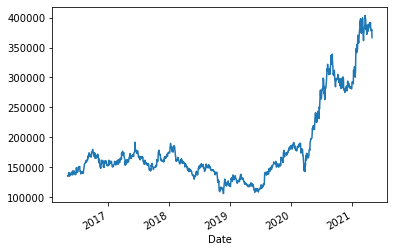

In [32]:
df2['Close'].plot()

<AxesSubplot:xlabel='Date'>

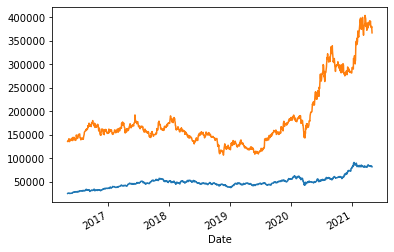

In [33]:
df['Close'].plot()
df2['Close'].plot()